## Project description

<b>The success of video game sales based on online store data for 1980 - 2016. </b>


<b> Study description:</b>

Identification of the impact of video game characteristics on sales.


<b>Research purpose:</b>

Conduct data analysis on the dependence of global sales on parameters such as release year, genre, release platform, reviews. Calculate the correlation between reviews and video game sales.


<b>Research objectives:</b>

 1. <a href = '#data'> Data preparation</a> - checking for gaps and duplicates.
 2. <a href = '#res'>Data exploration.</a>
 3. Definition of <a href = '#actual'>actual period</a> for forecasting sales for 2017.
 4. Computing top games by <a href = '#platf'>platforms</a>, <a href = '#genre'>genre</a> and <a href = '#year'>release year</a >.
 5. Impact of <a href = '#review'>reviews</a> on sales.
 5. Drawing up <a href = '#face'> portrait </a> of the user.
 4. Testing <a href = '#hyp'> hypotheses </a> by comparing the ratings of two games.



<b> Initial data: </b> Dataset of data collected up to 2017.
Includes options such as:

    Name - the name of the game
    Platform - platform
    Year_of_Release - year of release
    Genre - game genre
    NA_sales - sales in North America (millions of copies sold)
    EU_sales - sales in Europe (millions of copies sold)
    JP_sales - sales in Japan (millions of copies sold)
    Other_sales - sales in other countries (millions of copies sold)
    Critic_Score - Critics score (maximum 100)
    User_Score - user score (maximum 10)
    Rating - rating from the ESRB organization.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')

<a id = 'data'></a> 
## Подготовка данных 



In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
# Приведение столбцов к нижнему регситру

data.columns = data.columns.str.lower()

In [6]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [7]:
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пропуски' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось! ')

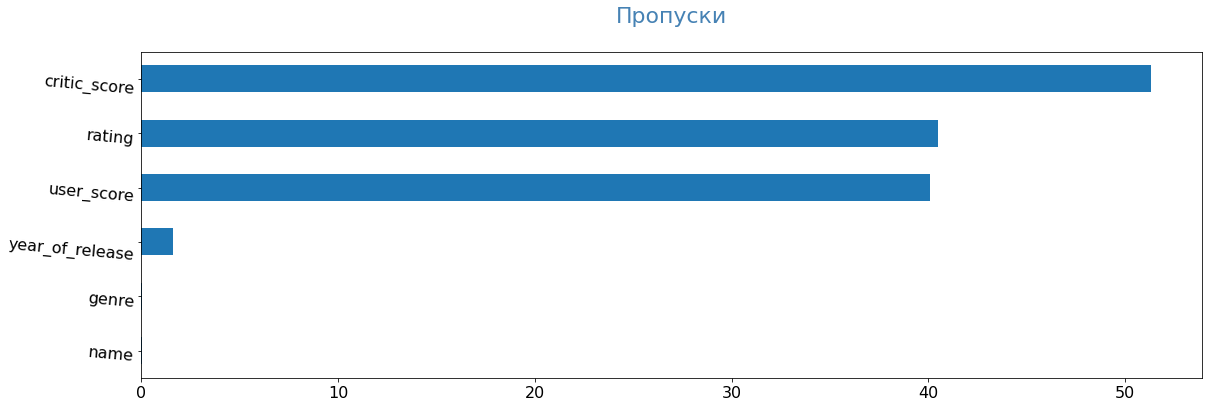

In [8]:
pass_value_barh(data)

In [9]:
data[data['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [10]:
data['critic_score'].isna().sum()

8578

In [11]:
data['user_score'].isna().sum()

6701

### Empty values in user_score

Out of 16715 inputs, 'tbd' values are 2424 rows. Let's convert these values to NaN, since there is no actual data. Therefore, we simplify the categorization.

In [12]:
# заменяем значения 'tbd' на NaN

data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [13]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

The main reason for gaps may be the lack of combining from different sources (websites) to collect information, since half of the required values are not available. We leave gaps for this parameter.

Let's translate the parameter into a numeric value.

In [14]:
# оценки пользователей в числовом значении

data['user_score'] = pd.to_numeric(data['user_score'])

### Empty values in critic_score

Similarly to the previous parameter, 8578 values out of the same 16715 are missing.

In [15]:
data['critic_score'].isna().sum()

8578

In [16]:
data['critic_score'] = data['critic_score'].astype(float)

### Empty values in rating

In [17]:
# разберем значения рейтингов

data['rating'].value_counts(dropna = False)

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In [18]:
# количество общих пропущенных значений с рейтингом

data['rating'].isna().sum()

6766

In [19]:
# количество пропущенных значений рейтинга сгрупированных по платформам

data[data['rating'].isna()]['platform'].value_counts()

PS      989
DS      878
PS2     680
PSP     665
PS3     379
N64     319
Wii     318
GBA     300
3DS     292
PSV     279
SNES    239
X360    210
PC      200
SAT     173
PS4     137
2600    133
GB       98
NES      98
XB       91
GC       87
XOne     61
WiiU     42
DC       38
GEN      29
NG       12
WS        6
SCD       6
3DO       3
TG16      2
PCFX      1
GG        1
Name: platform, dtype: int64

In [20]:
# количество выхода игр по годам

data['year_of_release'].value_counts().sort_values()

1980.0       9
1985.0      14
1984.0      14
1988.0      15
1990.0      16
1987.0      16
1983.0      17
1989.0      17
1986.0      21
1982.0      36
1991.0      41
1992.0      43
1981.0      46
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1999.0     338
2000.0     350
1998.0     379
2001.0     482
2016.0     502
2013.0     544
2014.0     581
2015.0     606
2012.0     653
2004.0     762
2003.0     775
2002.0     829
2005.0     939
2006.0    1006
2011.0    1136
2007.0    1197
2010.0    1255
2009.0    1426
2008.0    1427
Name: year_of_release, dtype: int64

The bulk of the empty values are in PS and DS platforms. The PS platform released games between 1994 and 2003. It can be seen that in 1994 there was a sharp increase in the number of released games, it is possible that the manufacturers did not have time to process / decide which ratings to assign.

To avoid data loss, we replace NaN rating values with 'unknown'.

In [21]:
# замена значений Nan в столбце rating на 'unknown'

data['rating'].replace(np.nan, 'unknown', inplace = True)

In [22]:
# проверка значений рейтинга

data['rating'].value_counts(dropna=False)

unknown    6766
E          3990
T          2961
M          1563
E10+       1420
EC            8
K-A           3
RP            3
AO            1
Name: rating, dtype: int64

### Empty values in name

In [23]:
# поиск пропущенных значением в имени

data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,unknown
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,unknown


As we can see, for games with gaps in names, gaps are present both in genres and in reviews. Let's get rid of these values.

In [24]:
# избавляемся от name с пропущенными значениями

data = data.drop(data[data['name'].isna()].index)

### Finding and processing duplicates

In [25]:
# поиск явных дубликатов

data.duplicated().sum()

0

In [26]:
# выведем все дубликаты в имени и платформе с помощью параметра keep

(data[data.duplicated(subset = ['name', 'platform'], keep = False)]
.sort_values(by = ['name', 'platform', 'year_of_release']))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.00,0.23,83.0,5.5,E
16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.00,0.00,83.0,5.5,E
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1745,Sonic the Hedgehog,PS3,2006.0,Platform,0.41,0.06,0.04,0.66,43.0,4.1,E10+
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.00,0.48,0.00,0.00,43.0,4.1,E10+


A clear duplicate is the game 'Madden NFL 13' as the release year and user review are the same.
Let's get rid of him.

In [29]:
# суммарные продажи во всех регионах

data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis='columns')

In [104]:
# удаление неявных дубликатов

data.drop(data[(data['name'] == 'Madden NFL 13') 
               & (data['total_sales'] == 0.01)].index, inplace = True)

data[data.duplicated(subset = ['name', 'platform'], keep = False)]\
.sort_values(by = ['name', 'platform', 'year_of_release'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T,0.08
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56


The game, called Sonic the Hedgehog, has an implicit duplicate without a release year, but with the same platform, reviews, and rating. It is possible that the values were not combined and matched. Let's get rid of this value.

In [31]:
data.drop(data[(data['name'] == 'Sonic the Hedgehog') 
               & (data['total_sales'] == 0.48)].index, inplace = True)

data[data.duplicated(subset = ['name', 'platform'], keep = False)]\
 .sort_values(by = ['name',  'year_of_release'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T,1.25
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T,0.29
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T,1.56
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.00,0.06,0.00,0.02,82.0,8.5,T,0.08


Need for Speed: Most Wanted was released 2 times in 2005 and 2012 on 2 different platforms - X360, PC which is not a duplicate.

<a id = 'res'></a>
## Exploratory data analysis

In [32]:
data_pl_sal = (data.groupby('platform')['total_sales']
                .sum().sort_values(ascending = False).reset_index().head(10))

data_pl_sal

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.16
3,Wii,907.51
4,DS,806.12
5,PS,730.86
6,GBA,317.85
7,PS4,314.14
8,PSP,294.05
9,PC,259.52


In [33]:
data_pl_sal_10 = (data.groupby('platform')['total_sales']
                  .sum().sort_values(ascending = False).head(10))

data_pl_sal_10

platform
PS2     1255.77
X360     971.42
PS3      939.16
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: total_sales, dtype: float64

<a id = 'year'></a>
### Number of games in different years

Consider the distribution of platforms over the total time period depending on the volume of sales.

In [34]:
# функция выводящая данные в сводную таблицу (год выпуска и общие продажи) для построения графика

def plat_sales(plat, df):
    
    return (df
            .query('platform == @plat')
            
            .pivot_table(index = 'year_of_release', values = 'total_sales')
            
            .sort_values(by = 'year_of_release', ascending = False)
    )

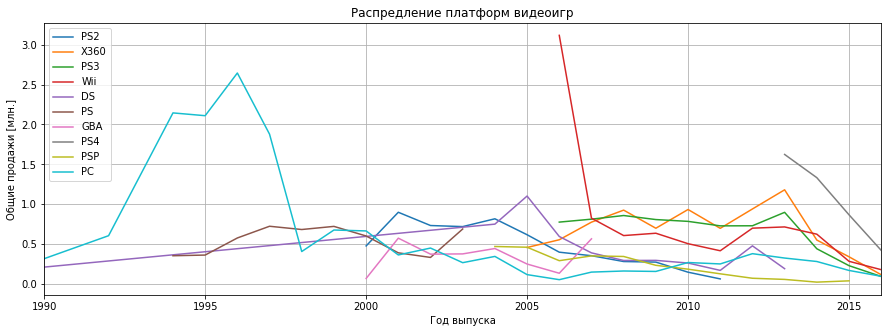

In [35]:
# построение графика для сводной таблицы с годом выпуска и общими продажами 

for i in data_pl_sal_10.index:
    
    plat_sales(i, data)['total_sales'].plot(figsize = (15, 5), 
                                            grid = True, label = i, 
                                            xlim = (1990, 2016))
    
    plt.ylabel('Общие продажи [млн.]')
    plt.xlabel('Год выпуска')
    plt.title('Распредление платформ видеоигр')
    plt.legend()

In [105]:
data.groupby('platform')['year_of_release'].max().sort_values()

platform
2600    1989.0
GG      1992.0
SCD     1994.0
GEN     1994.0
NES     1994.0
3DO     1995.0
TG16    1995.0
NG      1996.0
PCFX    1996.0
SNES    1999.0
SAT     1999.0
WS      2001.0
GB      2001.0
N64     2002.0
PS      2003.0
GC      2007.0
GBA     2007.0
XB      2008.0
DC      2008.0
PS2     2011.0
DS      2013.0
PSP     2015.0
PS3     2016.0
PS4     2016.0
PSV     2016.0
3DS     2016.0
Wii     2016.0
WiiU    2016.0
X360    2016.0
PC      2016.0
XOne    2016.0
Name: year_of_release, dtype: float64

Platforms like PS, GBA and PS2 stopped releasing their games in 2004, 2008, 2014, respectively.
The interval from 2014 - 2016 (inclusive) was chosen for actual data.

In [38]:
actual = data.query('year_of_release >= 2014 & year_of_release <= 2016')

<a id = 'actual'> </a>
### Sales by Platform & Data for the actual period

Consider the distribution of platforms over the total time period depending on the volume of sales.

<AxesSubplot:title={'center':'Общие продажи по платформам в 1980 - 2016г.'}, xlabel='Платформы', ylabel='Общие продажи [млн.]'>

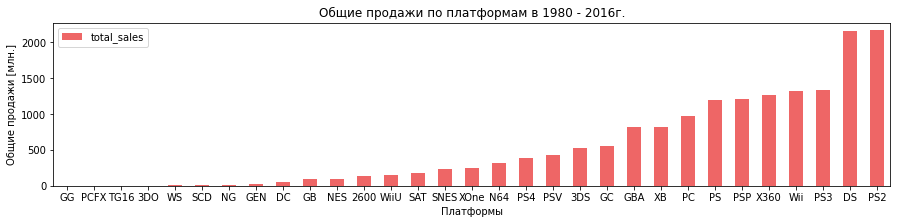

In [109]:
(data

    .pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'count')
 
    .sort_values(by = 'total_sales')
 
    .plot(figsize = (15, 3) ,xlabel = 'Платформы', 
          ylabel = 'Общие продажи [млн.]', kind = 'bar',
          rot = 360, color='#EE6666', title = 'Общие продажи по платформам в 1980 - 2016г.')

)

<AxesSubplot:title={'center':'Общие продажи по платформам в 2014-2016г.'}, xlabel='Платформы', ylabel='Общие продажи [млн.]'>

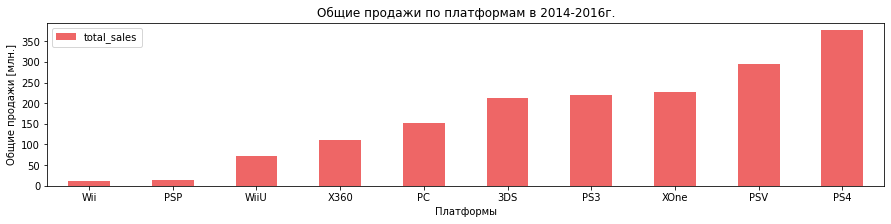

In [108]:
(actual

    .pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'count')
 
    .sort_values(by = 'total_sales')
 
    .plot(figsize = (15, 3) ,xlabel = 'Платформы', 
          ylabel = 'Общие продажи [млн.]', kind = 'bar',
          rot = 360, color='#EE6666', title = 'Общие продажи по платформам в 2014-2016г.')

)

Even though in the full (1980-2016) time span, PS2 (released in 2000) is the most popular platform. In the current period for us - (2014-2016) - PS4, released in 2013.

<a id = 'platf'></a>
### Sales leaders

At this stage, we will study which of the platforms PS4, Xbox One, 3DS, PS3, X360, WiiU, PC, PSV, Wii, PSP have positive or negative growth trends in 2014-2016.

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16711 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16711 non-null  object 
 1   platform         16711 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16711 non-null  object 
 4   na_sales         16711 non-null  float64
 5   eu_sales         16711 non-null  float64
 6   jp_sales         16711 non-null  float64
 7   other_sales      16711 non-null  float64
 8   critic_score     8135 non-null   float64
 9   user_score       7588 non-null   float64
 10  rating           16711 non-null  object 
 11  total_sales      16711 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


In [39]:
act_id = actual.groupby('platform')['total_sales'].sum().sort_values( ascending = False)

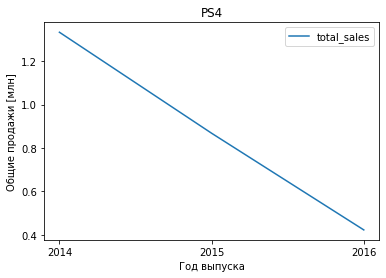

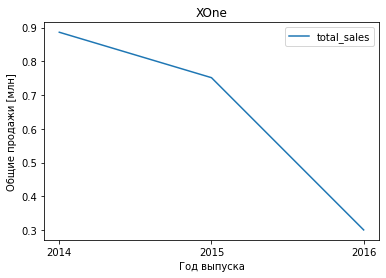

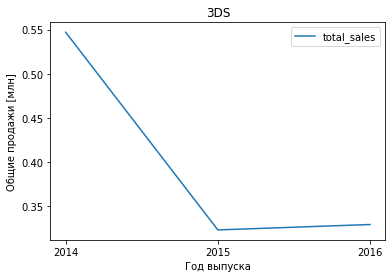

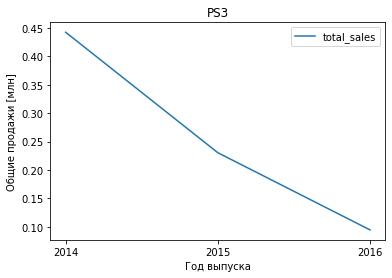

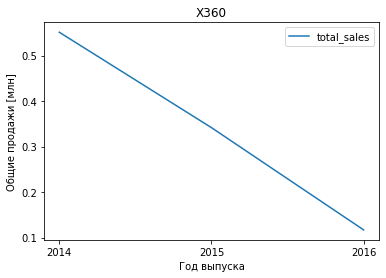

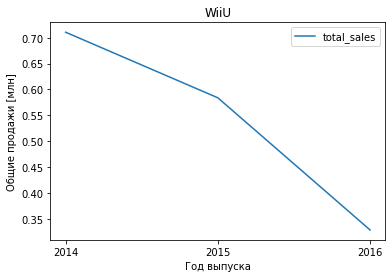

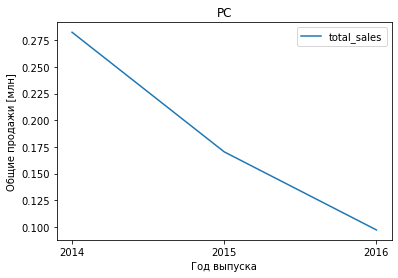

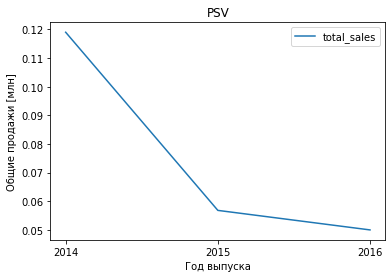

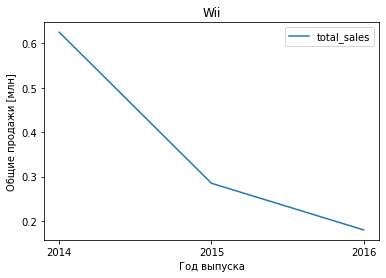

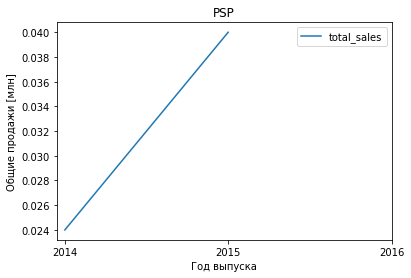

In [40]:
for i in act_id.index:
    
    plat_sales(i, actual).plot()
    plt.title(i)
    plt.xticks([2014, 2015, 2016])
    plt.xlabel('Год выпуска')
    plt.ylabel('Общие продажи [млн]')

Let's analyze the sales trend - their growth or decline by platform in the period of 2014 - 2016.
For platforms PS4, XOne, PS3, X360, WiiU, PC, PSV, Wii, sales are rapidly falling by 2016. The 3DS platform, sales are higher in 2016 than in 2015. And the PSP platform does not have data for 2016, but still has a positive trend in sales growth. Let's take a closer look at this platform.

In [41]:
# платформа PSP и год выпуска с 2014 года

data[(data['platform'] == 'PSP') & (data['year_of_release'] >= 2014)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
11107,Pro Yaky? Spirits 2014,PSP,2014.0,Sports,0.0,0.0,0.09,0.0,NaN,NaN,unknown,0.09
11486,Uta no Prince-Sama: All Star After Secret,PSP,2015.0,Action,0.0,0.0,0.08,0.0,NaN,NaN,unknown,0.08
13451,Toukiden Kiwami,PSP,2014.0,Action,0.0,0.0,0.05,0.0,NaN,NaN,unknown,0.05
15026,Juusanshi Engi Engetsu Sangokuden 2,PSP,2014.0,Action,0.0,0.0,0.02,0.0,NaN,NaN,unknown,0.02
15508,Gakuen K: Wonderful School Days,PSP,2014.0,Adventure,0.0,0.0,0.02,0.0,NaN,NaN,unknown,0.02
15996,Harukanaru Toki no Naka de 6,PSP,2015.0,Action,0.0,0.0,0.02,0.0,NaN,NaN,unknown,0.02
16069,Meiji Toukyou Renka: Twilight Kiss,PSP,2015.0,Action,0.0,0.0,0.02,0.0,NaN,NaN,unknown,0.02
16129,Shinobi Koutsutsu,PSP,2014.0,Adventure,0.0,0.0,0.01,0.0,NaN,NaN,unknown,0.01
16233,Geten no Hana: Yume Akari,PSP,2014.0,Misc,0.0,0.0,0.01,0.0,NaN,NaN,unknown,0.01
16313,Bakumatsu Rock,PSP,2014.0,Action,0.0,0.0,0.01,0.0,NaN,NaN,unknown,0.01


It is noteworthy that for the PSP platform since 2014, only sales in Japan (where sales began the earliest) were taken into account. It is possible that sales data in other regions since 2013 have been lost.

In [42]:
# поиск последнего года для платформы PSP, где продажи в других регионах не нулевые

data[(data['platform'] == 'PSP') & (data['na_sales'] > 0)].sort_values(by = 'year_of_release', 
                                                                       ascending = False).head(2)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
10947,Major League Baseball 2K12,PSP,2012.0,Sports,0.08,0.00,0.00,0.01,NaN,NaN,E,0.09
5300,FIFA Soccer 13,PSP,2012.0,Action,0.05,0.18,0.02,0.09,NaN,3.2,E,0.34


### Boxplot 

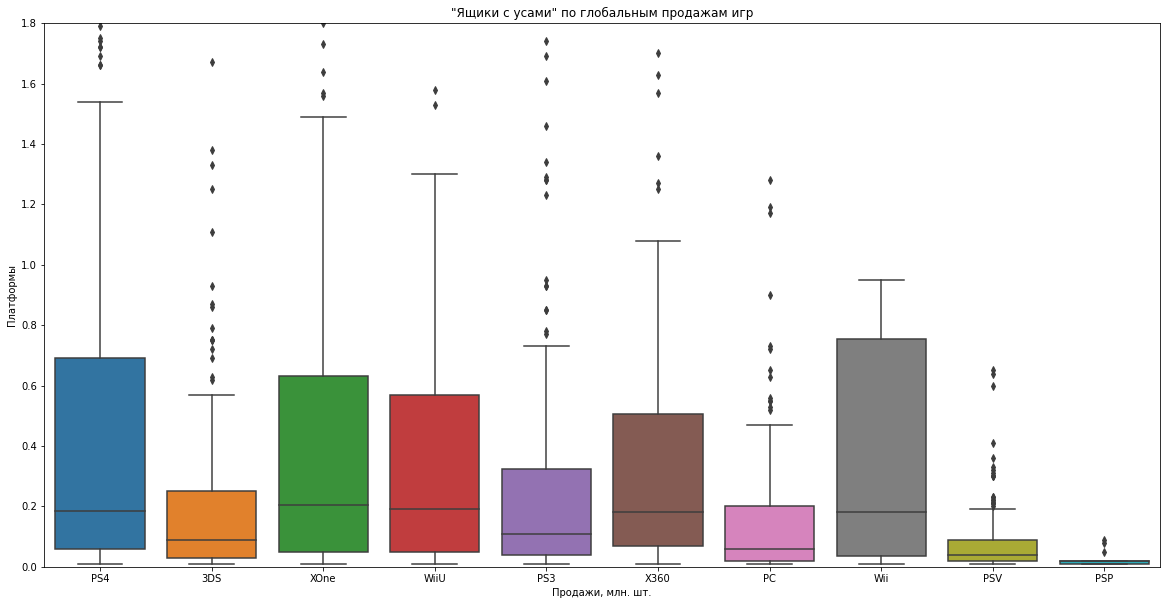

In [43]:
import seaborn as sns

plt.figure(figsize=(20, 10))

sns.boxplot(data=actual, x='platform', y='total_sales')

plt.ylim(0, 1.8)

plt.title('"Ящики с усами" по глобальным продажам игр')
plt.xlabel('Продажи, млн. шт.')
plt.ylabel('Платформы')

plt.show()


The PS4 and XOne platforms have the highest sales spread. And the highest median value of sales is from the XOne platform. We can say that the most successful platform, according to the swing diagram, is the XOne platform.

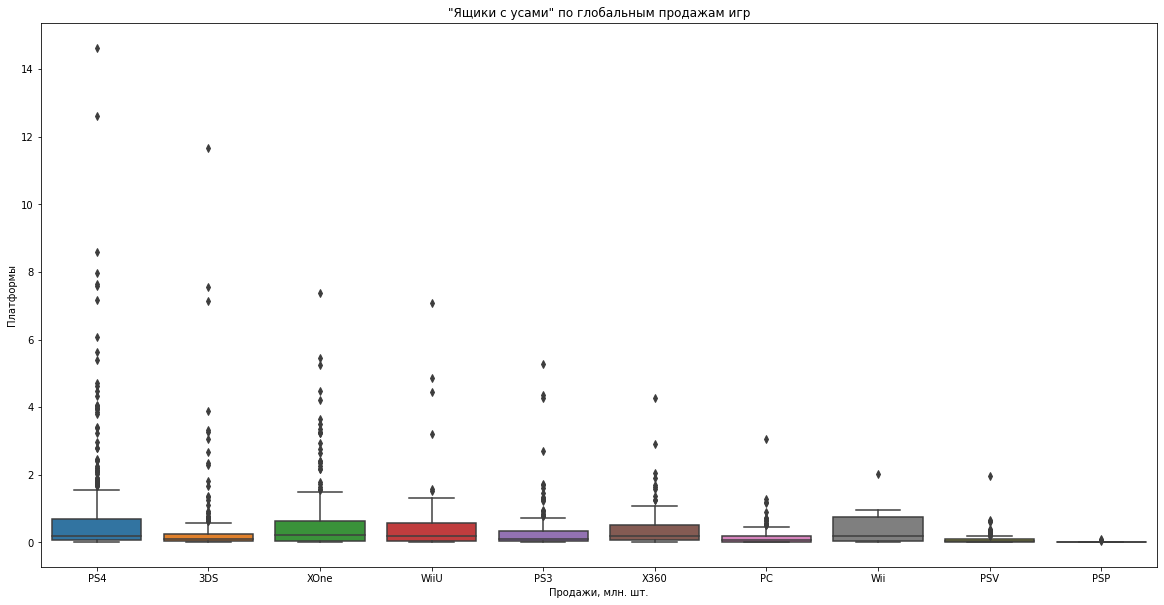

In [44]:
plt.figure(figsize=(20, 10))

sns.boxplot(data=actual, x='platform', y='total_sales')


plt.title('"Ящики с усами" по глобальным продажам игр')
plt.xlabel('Продажи, млн. шт.')
plt.ylabel('Платформы')

plt.show()

<a id = 'review'></a>
### Impact of reviews from critics and users on sales

Let's choose the most successful identified XOne platform and consider the impact of user and critic feedback on global sales based on a scatter scatter plot.

In [45]:
# функция принимающая платформу, тип оценки, 
# выводящая график scatter для визуализации корреляции платформы и типа оценки

def corr_sal_score(df, platform, score):
    
    return (df
               .query('platform == @platform')
            
               .plot(kind = 'scatter', y = 'total_sales',
                     
                     x = score, title = platform, alpha = 0.5, 
                     
                     c = 'total_sales', cmap='tab10', label = score,
                     
                     xlabel = 'Отзывы', ylabel = 'Общие продажи [млн.]'
                     
                    )
           )

Text(0.5, 1.0, 'Влияние отзывов пользователей на глобальные продажи платформы XOne')

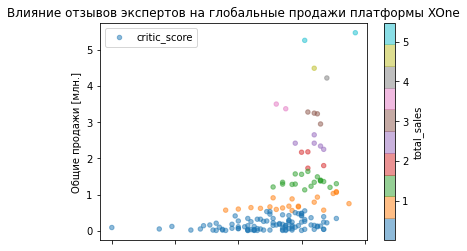

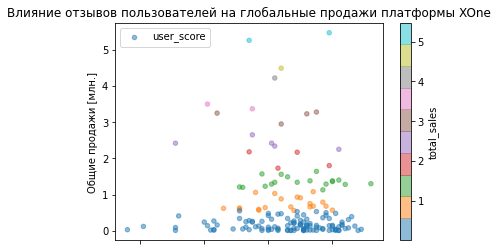

In [46]:
# график корреляции для платформы XOne и оценки экспертов

corr_sal_score(actual, 'XOne', 'critic_score')
plt.title('Влияние отзывов экспертов на глобальные продажи платформы XOne')
plt.xlabel('оценка')

# график корреляции для платформы XOne и оценки пользователей

corr_sal_score(actual, 'XOne', 'user_score')
plt.title('Влияние отзывов пользователей на глобальные продажи платформы XOne')

In [47]:
print(actual.query('platform == "XOne"')['total_sales'].corr(actual['critic_score']))

print(actual.query('platform == "XOne"')['total_sales'].corr(actual['user_score']))

print(actual.query('platform == "XOne"')['critic_score'].corr(actual['user_score']))

0.42867694370333226
-0.0703839280647581
0.4409773483764412


* As we can see, user reviews <b>have no correlation</b> with sales.

* While critic reviews have a higher, but at the same time <b>medium-weak correlation</b> with overall sales. The ratings of users and experts also have a medium-weak correlation.

* Conclusion - reviews from critics and users <b> have no direct impact </b> on sales.
In order to apply this conclusion to other platforms, consider another example on PS4.



Text(0.5, 1.0, 'Влияние отзывов пользователей на глобальные продажи платформы PS4')

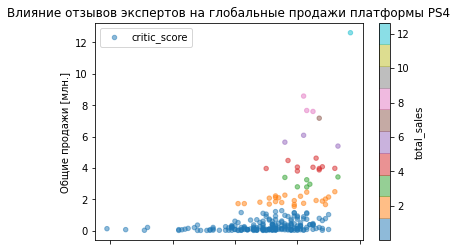

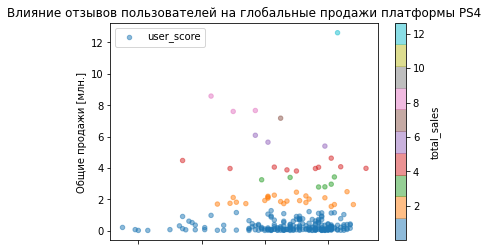

In [48]:
corr_sal_score(actual, 'PS4', 'critic_score')
plt.title('Влияние отзывов экспертов на глобальные продажи платформы PS4')


corr_sal_score(actual, 'PS4', 'user_score')
plt.title('Влияние отзывов пользователей на глобальные продажи платформы PS4')


In [49]:
print(actual.query('platform == "PS4"')['total_sales'].corr(actual['critic_score']))

print(actual.query('platform == "PS4"')['total_sales'].corr(actual['user_score']))

print(actual.query('platform == "PS4"')['critic_score'].corr(actual['user_score']))

0.40266141068104083
-0.040131589472697356
0.546434245119031


* The correlation of experts' assessments to sales is weakly expressed, it can be attributed to <b>weak - medium </b>.
* Relationship between user ratings and global sales <b>none</b> - zero value.
* The relationship between user ratings and expert ratings is <b>average</b>.

<a id = 'genre'></a>
### General distribution of games by genre

Let's consider the general distribution of games by genres by global sales, in the time period of 2014-2016 and identify the most popular genres.

Text(0.5, 1.0, 'Распределение жанров')

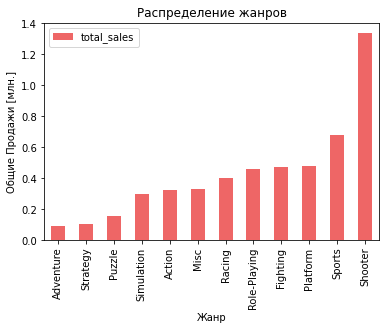

In [50]:
(actual
 
    .pivot_table(index = 'genre', values ='total_sales')
 
    .sort_values(by = 'total_sales')
 
    .plot(kind = 'bar', color='#EE6666', title = 'sales',
          xlabel = 'Жанр', ylabel = 'Общие Продажи [млн.]', 
          )
)
plt.title('Распределение жанров')

The most profitable genres are Shooter. Obviously, this is one of the most popular platforms with male users, who are the main client flow. Lowest sales for Adventure.

<a id = 'face'></a>
## User portrait of each region

At this stage, we will take a closer look at the preferred platforms and genres of users in each region, as well as the impact of rating on sales.

In [51]:
def top5(kind, region):
    return (actual
           .pivot_table(index = kind, values = region, aggfunc = 'sum')
            
           .sort_values(by = region, ascending = False) 
            
           .head(5) 
           )

In [55]:
def plot_top5(df, region):
    return (df
           .plot(kind = 'pie', y = region, autopct='%1.1f%%', colors=[color[v] for v in color.keys()])
                 
           .set(title = 'Продажи платформ', ylabel = region) 
                
           )

In [52]:
color = {'PS4' : '#DC143C', 
          'Xone' : '#C0C0C0', 
          'X360' : '#8FBC8F', 
          '3DS' : '#FFF0F5', 
          'PS3' : '#ADD8E6',
          'PC' : '#FFFACD',
          'PSV' : '#778899',
          'WiiU': '#C71585'
         }

In [53]:
color.keys()

dict_keys(['PS4', 'Xone', 'X360', '3DS', 'PS3', 'PC', 'PSV', 'WiiU'])

In [54]:
actual['platform'].value_counts().keys()

Index(['PS4', 'PSV', 'XOne', 'PS3', '3DS', 'PC', 'X360', 'WiiU', 'PSP', 'Wii'], dtype='object')

In [81]:
# изменим курсив для label-ов
font = {
    'family' : 'sans-serif',
    'weight' : 'bold',
    'size': 16
}

### Popular platforms

For regions: America, Europe and other continents, one of the popular platforms is PS4 and XOne. While in Japan the 3DS leads the way and then the PS4.

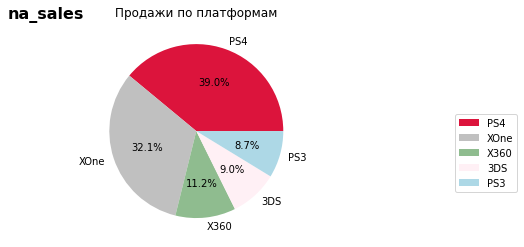

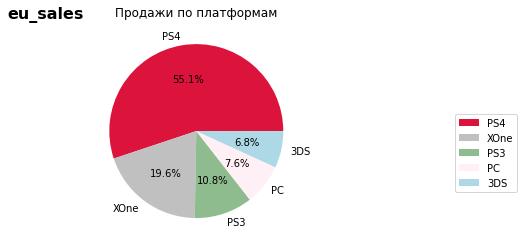

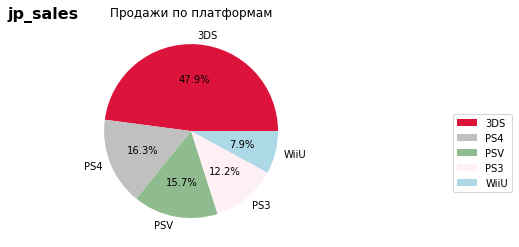

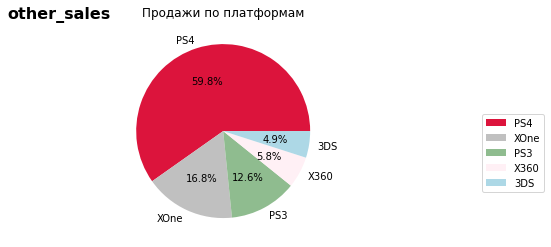

In [84]:
# Построение распределения продаж по платформам в зависимости от региона

for j in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    plot_top5(top5('platform', j), j)
    plt.legend(bbox_to_anchor=(2, 0.6))
    plt.title('Продажи по платформам')
    plt.ylabel(ylabel = j, loc = 'top', rotation=0, fontdict = font)

### Popular genres


The same trend is seen in the genre characteristics: America, Europe and other regions use Action, Shooter, Sports genres. While Japanese users prefer Role - Playing.

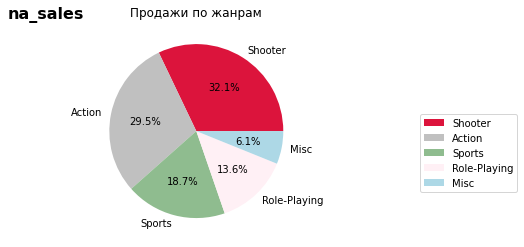

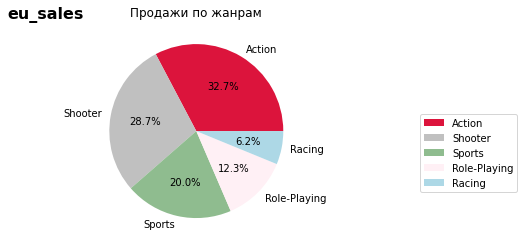

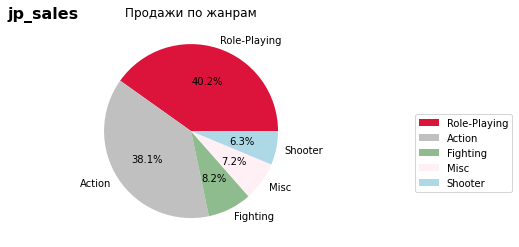

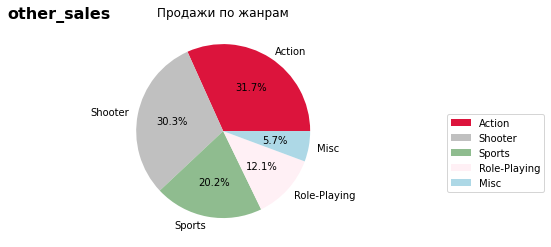

In [83]:
# Построение распределения продаж по жанрам в зависимости от региона

for j in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    plot_top5(top5('genre', j), j)
    plt.legend(bbox_to_anchor=(2, 0.6))
    plt.title('Продажи по жанрам')
    plt.ylabel(ylabel = j, loc = 'top', rotation=0, fontdict = font)

### Popular ratings

The missing values in the ratings for the Americas, Europe and other regions are ~ 22% and the main game rating is M (17+).

For the Japanese data, missing values are the worst at 61%, so the main rating is T (13+). While the rating for the category "mature" - M, is only ~ 9%.

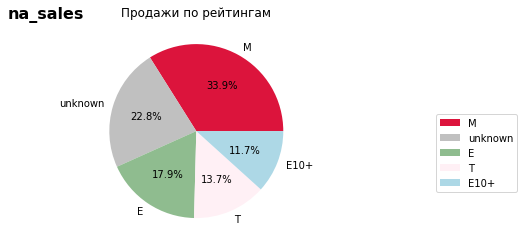

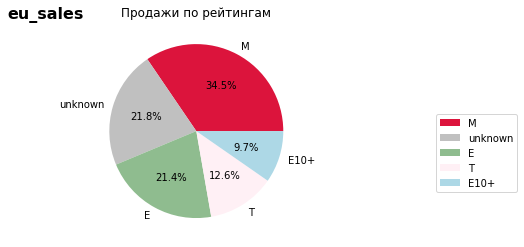

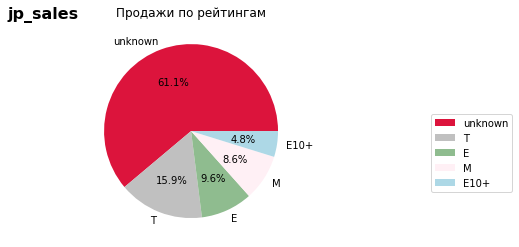

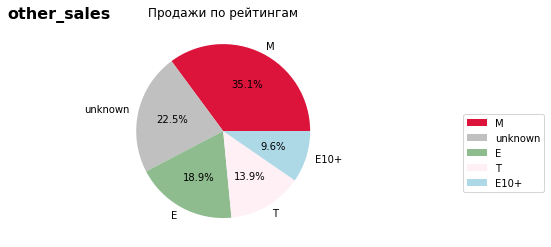

In [85]:
# Построение распределения продаж по рейтингам в зависимости от региона

for j in ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']:
    plot_top5(top5('rating', j), j)
    plt.legend(bbox_to_anchor=(2, 0.6))
    plt.title('Продажи по рейтингам')
    plt.ylabel(ylabel = j, loc = 'top', rotation=0, fontdict = font)

<a id = 'hyp'></a>
## Hypothesis testing

### Hypothesis 1:

$ H_0 :$ The average user ratings for the Xbox One and PC platforms are <u>same</u>.


$ H_1 :$ Average user ratings for Xbox One and PC platforms are <u>NOT the same</u>.

Let's test the variance across the two platforms to determine the equal_var parameter in ttest_ind, which compares two means of the independent variables.

In [93]:
# Дисперсия значений отзывов пользователей платформы XOne

var_Xp = np.var(actual.query('platform == "XOne"')['user_score'])

# Дисперсия значений отзывов пользователей платформы PC

var_Pp = np.var(actual.query('platform == "PC"')['user_score'])

# Проверка для использования параметра equal_var = True или False

if var_Xp != var_Pp:
    print(('Дисперсии платформ имеют разные значения {} - XOne и {} - PC')\
          .format(round(var_Xp, 1), round(var_Pp, 1) ))
    print('Применим параметр equal_var = False')
else:
    print('Дисперсии имеют одинаковые значения')

Дисперсии платформ имеют разные значения 1.9 - XOne и 2.9 - PC
Применим параметр equal_var = False


In [62]:
# Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

# Cтатистическая значимость - 5%
alpha = 0.05

# Статистический анализ двухстороннего t-testa с опущением нулевых значений
results = st.ttest_ind(actual.query('platform == "XOne"')['user_score'], 
                       actual.query('platform == "PC"')['user_score'], 
                       equal_var = False, nan_policy = 'omit')

print('p - value:', results.pvalue)

if results.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Failed to reject the null hypothesis')

p - value: 0.11601398086668943
Не получилось отвергнуть нулевую гипотезу


The average user ratings for the Xbox One and PC platform are NOT the same.

In [99]:
print(round(np.mean(actual.query('platform == "XOne"')['user_score']), 1))

print(round(np.mean(actual.query('platform == "PC"')['user_score']), 2))

6.6
6.3


The average rating of the XOne platform - 6.6 is different from the average rating of the PC platform - 6.3.

### Hypothesis 2:

$ H_0 :$ The average user ratings for Action and Sports are <u>different</u>.


$ H_1 :$ Average user ratings for Action and Sports <u>are NOT different</u>.

In [100]:
# Дисперсия значений отзывов пользователей жанра Экшн

var_Xg = np.var(actual.query('genre == "Action"')['user_score'])

# Дисперсия значений отзывов пользователей жанра Спорт

var_Pg = np.var(actual.query('genre == "Sports"')['user_score'])

# Сверка дисперсий
if var_Xg != var_Pg:
    print(('Дисперсии платформ имеют разные значения {} - XOne и {} - PC')\
          .format(round(var_Xg, 1), round(var_Pg, 1) ))
    print('Применим параметр equal_var = False')
else:
    print('Дисперсии имеют одинаковые значения')

Дисперсии платформ имеют разные значения 1.9 - XOne и 3.4 - PC
Применим параметр equal_var = False


In [66]:
# Средние пользовательские рейтинги жанров Action и Sports

# Cтатистическая значимость - 5%

alpha = 0.05

# Статистический анализ двухстороннего t-testa с опущением нулевых значений

results = st.ttest_ind(actual.query('genre == "Action"')['user_score'], 
                       actual.query('genre == "Sports"')['user_score'], 
                       equal_var = False, nan_policy = 'omit')

print('p - value:', results.pvalue)

if results.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Failed to reject the null hypothesis')

p - value: 1.182555038264477e-14
Отвергаем нулевую гипотезу


Average user ratings for the Action and Sports genres vary.

In [103]:
print(round(np.mean(actual.query('genre == "Action"')['user_score']), 2))
print(round(np.mean(actual.query('genre == "Sports"')['user_score']), 2))

6.76
5.23


# Conclusion

We have conducted a study evaluating the dependence of the characteristics of computer games on global sales.

We set several tasks and hypotheses:

1. Task 1 - calculate the actual period for the forecast for 2017.
2. Task 2 - to calculate the leading platforms, including by region.
3. Hypothesis 1 - the impact of reviews on sales.
4. Hypothesis 2 - the average user ratings of the Xbox One and PC platforms are the same.
5. Hypothesis 3 - the average user ratings of the Action and Sports genres are different.


<b>Task 1 - <u>Completed.</u></b>
The current period for the forecast for 2017 was chosen between 2014 and 2016.
(Further, the actual period will mean 2014-2016.)

<b>Task 2 - <u>Partly completed.</u></b>
Notable:
- Leading platform for all provided sales time - PS2,
- Leading platform for the current sales time - PS4,
- The leading genre in the current period (2014-2016) - Shooter,
- PSP and 3DS show a positive trend in sales for the current time period,
- the highest median value has the XOne platform, for the current time period,
- the highest sales have games with a platform in Japan - 3DS, and in other regions - PS4 and XOne,
- games with genres in Japan have the highest sales - games with roles, in all others - Action and Shooter.
- games with ratings in Japan have the highest sales - T, 13+ (most of the data for the rating in this region is lost), in other regions - lost data is 22%, but the main part of the rating is M, 17+.


<b>Hypothesis 1 - <u>Not confirmed.</u></b>
* User reviews <b>have no</b> correlation with global sales.
* Critical reviews have a <b>medium-weak</b> relationship with global sales.
* Critics' reviews and reviews also have a <b>medium-weak</b> relationship with each other.

<b>Hypothesis 2 - <u>Partly confirmed.</u></b>
Average user ratings across platforms are similar:
    Xbox One - 6.6,
    PC-6.3

<b>Hypothesis 3 - <u>Verified.</u></b>
Average user ratings across genres are not the same:
    Action - 6.8,
    Sports-5.2

<b>Output:</b>
The company should <b>pay attention</b> for forecasting for 2017 on:
1. PS4 and XOne platforms,
2. Genres Shooter and Action,
3. Age category 17+.
Since these parameters have positive trends in sales and are the main interests of customers.